In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('movies.dat', sep='::', engine='python', encoding='latin-1')
df.columns =['MovieIDs','MovieName','Category']
df.dropna(inplace=True)
df.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [3]:
df.shape

(3882, 3)

In [4]:
df2= pd.read_csv('ratings.dat', sep='::', engine='python', encoding='latin-1')
df2.columns =['ID','MovieID','Ratings','TimeStamp']
df2.dropna(inplace=True)
df2.head()

,ID,MovieID,Ratings,TimeStamp
0,660,529,4,975688859
1,660,62,3,975694635
2,660,386,3,975696381
3,660,2000,3,975698587
4,660,3740,4,976743652


In [5]:
df2["Ratings"].value_counts()

4    25054
3    17990
5    16504
2     7460
1     3868
Name: Ratings, dtype: int64

In [6]:
df2.shape

(70876, 4)

In [7]:
df3= pd.read_csv('users.dat', sep='::', engine='python', encoding='latin-1')
df3.columns =['UserID','Gender','Age','Occupation','Zip-code']
df3.dropna(inplace=True)
df3.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


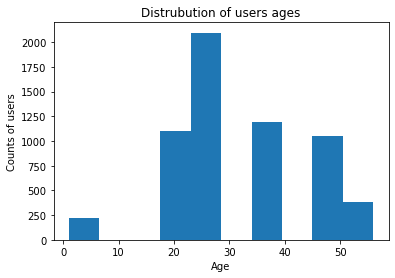

In [8]:
x=df3["Age"]
plt.hist(x)
plt.title("Distrubution of users ages")
plt.xlabel("Age")
plt.ylabel("Counts of users") 
plt.show()

[]

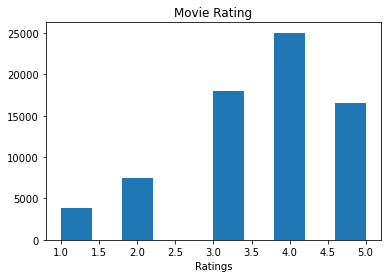

In [9]:
x1=df2["Ratings"]
plt.hist(x1)
plt.title("Movie Rating")
plt.xlabel("Ratings")
plt.plot()

In [10]:
x=df2.drop("Ratings",axis=1)
x.head()

,ID,MovieID,TimeStamp
0,660,529,975688859
1,660,62,975694635
2,660,386,975696381
3,660,2000,975698587
4,660,3740,976743652


In [11]:
y=df2["Ratings"]
y.head()

0    4
1    3
2    3
3    3
4    4
Name: Ratings, dtype: int64

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)

In [13]:
from sklearn.linear_model import LogisticRegression
tfc=LogisticRegression()
tfc.fit(x_train,y_train)

LogisticRegression()

In [14]:
tfc.score(x_test,y_test)

0.3538010045713641

In [15]:
y_pred=tfc.predict(x_test)
y_pred

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [16]:
df2=pd.DataFrame({
    "actual":y_test,
    "predicted":y_pred
})
df2

,actual,predicted
40919,1,4
67246,3,4
18080,1,4
53064,3,4
16502,2,4
...,...,...
1280,3,4
10705,4,4
57944,2,4
61827,3,4
